In [1]:
import numpy as np
import cv2
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import glob
import time
import random
from moviepy.editor import VideoFileClip
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from skimage.feature import hog
from sklearn.externals import joblib
from sklearn.cross_validation import train_test_split
from scipy.ndimage.measurements import label

In [2]:
# Initialize parameters
orient = 8  # HOG orientations
pix_per_cell = 8 # HOG pixels per cell
cell_per_block = 2 # HOG cells per block
hog_channel = 'ALL' # Can be 0, 1, 2, or "ALL"

In [3]:
def convert_color(img):
    feature_image = np.copy(img)
    if color_space != 'RGB':
        if color_space == 'HSV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
        elif color_space == 'LUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
        elif color_space == 'HLS':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
        elif color_space == 'YUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
        elif color_space == 'YCrCb':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    return feature_image

In [4]:
# Define a function to return HOG features and visualization
def get_hog_features(img, vis=False, feature_vec=True):
    # Call with two outputs if vis==True
    if vis == True:
        features, hog_image = hog(img, orientations=orient, 
                                  pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block), 
                                  transform_sqrt=True, 
                                  visualise=vis, feature_vector=feature_vec)
        return features, hog_image
    # Otherwise call with one output
    else:      
        features = hog(img, orientations=orient, 
                       pixels_per_cell=(pix_per_cell, pix_per_cell),
                       cells_per_block=(cell_per_block, cell_per_block), 
                       transform_sqrt=True, 
                       visualise=vis, feature_vector=feature_vec)
        return features

In [5]:
# Read Car image
car = mpimg.imread('vehicles/vehicles/GTI_Right/image0041.png')
# Read Not Car image
notcar = mpimg.imread('non-vehicles/non-vehicles/Extras/extra26.png')

# Create figure
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
#f.tight_layout()
# Add car image to figure
ax1.imshow((car*255).astype(np.uint8))
ax1.set_title('Car Image', fontsize = 40)
# Add Not Car image to figure
ax2.imshow((notcar*255).astype(np.uint8),cmap='gray')
ax2.set_title('Not Car Image', fontsize = 40)
# Save the figure
plt.savefig('output_images/car_not_car.jpg')

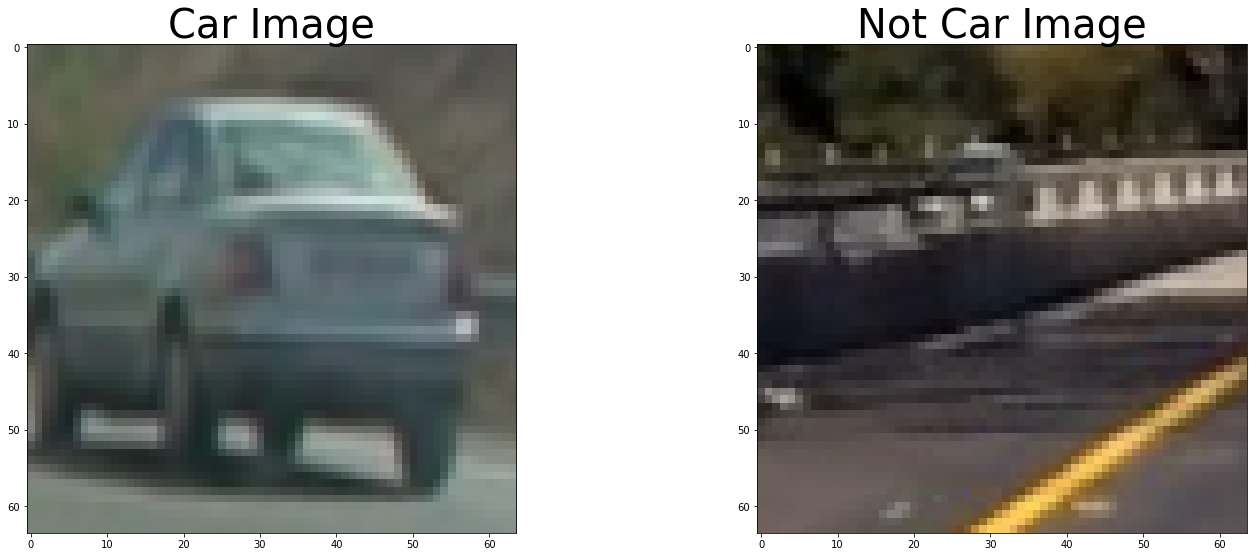

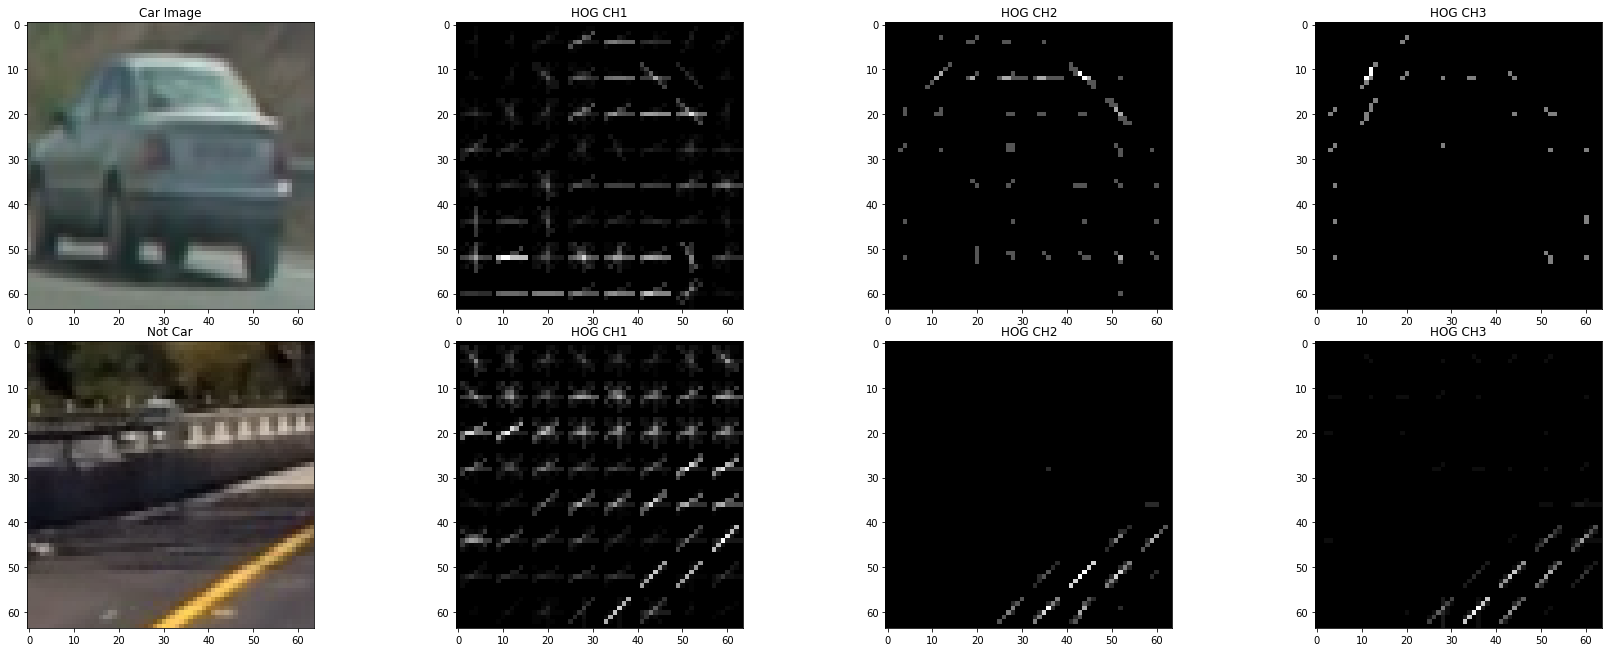

In [6]:
color_space = 'YCrCb' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb

f, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(2, 4, figsize=(24, 9))
f.tight_layout()
ax1.imshow((car*255).astype(np.uint8))
ax1.set_title('Car Image')

car = convert_color(car)

features, hog_image = get_hog_features(car[:,:,0], vis = True)
ax2.imshow((hog_image*255).astype(np.uint8),cmap='gray')
ax2.set_title('HOG CH1')

features, hog_image = get_hog_features(car[:,:,1], vis = True)
ax3.imshow((hog_image*255).astype(np.uint8), cmap='gray')
ax3.set_title('HOG CH2')

features, hog_image = get_hog_features(car[:,:,2], vis = True)
ax4.imshow((hog_image*255).astype(np.uint8), cmap='gray')
ax4.set_title('HOG CH3')

ax5.imshow((notcar*255).astype(np.uint8))
ax5.set_title('Not Car')

notcar = convert_color(notcar)

features, hog_image = get_hog_features(notcar[:,:,0], vis = True)
ax6.imshow((hog_image*255).astype(np.uint8),cmap='gray')
ax6.set_title('HOG CH1')

features, hog_image = get_hog_features(notcar[:,:,1], vis = True)
ax7.imshow((hog_image*255).astype(np.uint8), cmap='gray')
ax7.set_title('HOG CH2')

features, hog_image = get_hog_features(notcar[:,:,2], vis = True)
ax8.imshow((hog_image*255).astype(np.uint8), cmap='gray')
ax8.set_title('HOG CH3')

plt.show()
#plt.savefig('output_images/YCrCb_HOG.jpg')

In [7]:
# Define a function to extract features from a list of images
def extract_features(imgs):
    # Create a list to append feature vectors to
    features = []
    # Iterate through the list of images
    for file in imgs:
        file_features = []
        image = mpimg.imread(file)
        # apply color conversion if other than 'RGB
        feature_image = convert_color(image)
        hog_features = []
        for channel in range(feature_image.shape[2]):
            hog_features.extend(get_hog_features(feature_image[:,:,channel], vis=False, feature_vec=True))
        file_features.append(hog_features)
        features.append(np.concatenate(file_features))
    # Return list of feature vectors
    return features

In [8]:
# Read in cars and notcars
carimages = glob.glob('vehicles/vehicles/GTI_Far/*.png')
# Shuffle the images
random.shuffle(carimages)
# Extract only the top 100 images
carimages = carimages[0:100]

carimages1 = glob.glob('vehicles/vehicles/GTI_Left/*.png')
# Shuffle the images
random.shuffle(carimages1)
# Extract only the top 100 images
carimages1 = carimages1[0:100]

carimages2 = glob.glob('vehicles/vehicles/GTI_MiddleClose/*.png')
# Shuffle the images
random.shuffle(carimages2)
# Extract only the top 100 images
carimages2 = carimages2[0:100]

carimages3 = glob.glob('vehicles/vehicles/GTI_Right/*.png')
# Shuffle the images
random.shuffle(carimages3)
# Extract only the top 300 images
# carimages3 = carimages3[0:665]

carimgs = [carimages1,carimages2,carimages3]
for carimg in carimgs:
    for imagess in carimg:
        carimages.append(imagess)
cars = carimages

noncarimages = glob.glob('non-vehicles/non-vehicles/Extras/*.png')
# Shuffle the images
random.shuffle(noncarimages)
# Extract only the top 300 images
noncarimages = noncarimages[0:500]

noncarimages1 = glob.glob('non-vehicles/non-vehicles/GTI/*.png')
# Shuffle the images
random.shuffle(noncarimages1)
# Extract only the top 300 images
noncarimages1 = noncarimages1[0:500]

for noncarimage in noncarimages1:
    noncarimages.append(noncarimage)

notcars = noncarimages

# Get Car features
car_features = extract_features(cars)

# Get Non-Car features
notcar_features = extract_features(notcars)

# Combine car features and non-car features
X = np.vstack((car_features, notcar_features)).astype(np.float64)                        
# Fit a per-column scaler
X_scaler = StandardScaler().fit(X)
# Apply the scaler to X
scaled_X = X_scaler.transform(X)

# Define the labels vector
y = np.hstack((np.ones(len(car_features)), np.zeros(len(notcar_features))))

# Split up data into randomized training and test sets
rand_state = np.random.randint(0, 100)
# Split the data into train and test, using train_test_split() and using stratify = y, to make sure equal split 
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.2, stratify=y, random_state=rand_state)    

# Print No. of features used
print('Using:',orient,'orientations',pix_per_cell,
    'pixels per cell and', cell_per_block,'cells per block')
print('Feature vector length:', len(X_train[0]))

# Use a linear SVC 
svc = LinearSVC()
# Check the training time for the SVC
t=time.time()
# Fit the data
svc.fit(X_train, y_train)
t2 = time.time()
print(round(t2-t, 2), 'Seconds to train SVC...')
# Check the score of the SVC
print('Test Accuracy of SVC = ', round(svc.score(X_test, y_test), 4))
# Check the prediction time for a single sample
t=time.time()

# Define filename to save model
model = 'svc.pkl'
scaler = 'scaler.pkl'
# Save model and scaler using dump() function
_ = joblib.dump(svc, model)
_ = joblib.dump(X_scaler, scaler)

Using: 8 orientations 8 pixels per cell and 2 cells per block
Feature vector length: 4704
23.71 Seconds to train SVC...
Test Accuracy of SVC =  0.9644


In [38]:
def find_cars(img):
    
    # Load LinearSVC Model using load function
    svc = joblib.load('svc.pkl')
    
    # Load Scaler using load function
    X_scaler = joblib.load('scaler.pkl')
    
    # Deine empty list to store co-ordinates of rectangle indicating car
    bbox = []
    
    # Define scale variable to scal image
    scale = 1
    
    # Make a copy of input image to draw boxes
    draw_img = np.copy(img)
    
    # As model is trained on png image and test image is jppg image, we need to divide this by 255
    img = img.astype(np.float32)/255
    
    # Define y co-ordinate to start search from
    ystart = 400
    
    # Compress the along y axis, keeping only 100 pixels, 400 to 500
    img_tosearch = img[400:500,:,:]
    
    # Convert image to YCrCb color space
    ctrans_tosearch = convert_color(img_tosearch)
    
    # Scale the image if 'scale' != 1
    if scale != 1:
        imshape = ctrans_tosearch.shape
        ctrans_tosearch = cv2.resize(ctrans_tosearch, (np.int(imshape[1]/scale), np.int(imshape[0]/scale)))
    
    # Split the image into individual channels
    ch1 = ctrans_tosearch[:,:,0]
    ch2 = ctrans_tosearch[:,:,1]
    ch3 = ctrans_tosearch[:,:,2]
    
    # Compute individual channel HOG features for the entire image
    hog1 = get_hog_features(ch1, feature_vec=False)
    hog2 = get_hog_features(ch2, feature_vec=False)
    hog3 = get_hog_features(ch3, feature_vec=False)
    
    # Define list of window size
    windows = [64]
    # Define pixel_per_cell for each window size to get same feature size for all window size
    parameters = [8]
    # Looping through list of window size
    for (window, params) in zip(windows, parameters):
        pix_per_cell = params
        # Define blocks and steps as above
        nxblocks = (ch1.shape[1] // pix_per_cell)-1
        nyblocks = (ch1.shape[0] // pix_per_cell)-1
        nfeat_per_block = orient*cell_per_block**2
        # 64 was the orginal sampling rate, with 8 cells and 8 pix per cell
        #window = 64
        nblocks_per_window = (window // pix_per_cell)-1
        cells_per_step = 2  # Instead of overlap, define how many cells to step
        # Calculate No. of steps along x-axis and y-axis
        nxsteps = (nxblocks - nblocks_per_window) // cells_per_step
        nysteps = (nyblocks - nblocks_per_window) // cells_per_step
        
        # Loop through steps along x axis and y axis
        # Starting midway along x axis to reduce computation
        for xb in range(nxsteps // 2, nxsteps):
            for yb in range(nysteps):
                ypos = yb*cells_per_step
                xpos = xb*cells_per_step
                # Extract HOG for this patch
                hog_feat1 = hog1[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
                hog_feat2 = hog2[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
                hog_feat3 = hog3[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
                hog_features = np.hstack((hog_feat1, hog_feat2, hog_feat3))
                
                # Calculate xleft and ytop through each iteration
                xleft = xpos*pix_per_cell
                ytop = ypos*pix_per_cell

                # Extract the image patch
                subimg = cv2.resize(ctrans_tosearch[ytop:ytop+window, xleft:xleft+window], (64,64))

                # Scale features and make a prediction
                test_features = X_scaler.transform(hog_features.reshape(1,-1))
                test_prediction = svc.predict(test_features)
                
                # Check test_prediction, if greater than 0.5, then add the co-ordinates indicating car to bbxox list
                if test_prediction > 0.5:
                    # Compute xbox_left, ytop_draw and win_draw corresponding to scale
                    xbox_left = np.int(xleft*scale)
                    ytop_draw = np.int(ytop*scale)
                    win_draw = np.int(window*scale)
                    # Create tuple for top-left and bottom-right co-ordinates of rectangle
                    box = ((xbox_left, ytop_draw+ystart),(xbox_left+win_draw,ytop_draw+win_draw+ystart))
                    # Append the tuple to the list of rectangle indicating car
                    bbox.append(box)
                    # cv2.rectangle(draw_img,(xbox_left, ytop_draw+ystart),(xbox_left+win_draw,ytop_draw+win_draw+ystart),(0,0,255),6) 
        box_list = bbox
        heat = np.zeros_like(draw_img[:,:,0]).astype(np.float)
        # Add heat to each box in box list
        heat = add_heat(heat,box_list)
        
        # Apply threshold to help remove false positives
        #heat = apply_threshold(heat, 1)
        
        # Visualize the heatmap when displaying    
        heatmap = np.clip(heat, 0, 255)
        
        # Find final boxes from heatmap using label function
        labels = label(heatmap)
        draw_img = draw_labeled_bboxes(np.copy(draw_img), labels)
    
    # Return image having box
    return draw_img

In [39]:
def add_heat(heatmap, bbox_list):
    # Iterate through list of bboxes
    for box in bbox_list:
        # Add += 1 for all pixels inside each bbox
        # Assuming each "box" takes the form ((x1, y1), (x2, y2))
        heatmap[box[0][1]:box[1][1], box[0][0]:box[1][0]] += 1

    # Return updated heatmap
    return heatmap# Iterate through list of bboxes
    
def apply_threshold(heatmap, threshold):
    # Zero out pixels below the threshold
    heatmap[heatmap <= threshold] = 0
    # Return thresholded map
    return heatmap

def draw_labeled_bboxes(img, labels):
    # Iterate through all detected cars
    for car_number in range(1, labels[1]+1):
        # Find pixels with each car_number label value
        nonzero = (labels[0] == car_number).nonzero()
        # Identify x and y values of those pixels
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])
        # Define a bounding box based on min/max x and y
        bbox = ((np.min(nonzerox), np.min(nonzeroy)), (np.max(nonzerox), np.max(nonzeroy)))
        # Draw the box on the image
        cv2.rectangle(img, bbox[0], bbox[1], (0,0,255), 6)
    # Return the image
    return img


## Pipeline to test on test images

In [44]:
# Define counter to save test images
i=1
# Read list of test image
testimages = glob.glob('test_images/*.jpg')
# loop through test image to detect car in each
for imagepath in testimages:
    # Read the image
    image = mpimg.imread(imagepath)
    # Pass the image through pipeline
    window_img = find_cars(image)
    # Convert the image from RGB to BGR, to save it using cv2.imwrite()
    window_img = cv2.cvtColor(window_img, cv2.COLOR_RGB2BGR)
    # Define output path
    path = 'output_images/outputs/output'+str(i)+'.jpg'
    # Save the image
    cv2.imwrite(path, window_img)
    # Print the no. of test images done
    print (i)
    # Increment the counter
    i = i + 1
print ("Done!")

1
2
3
4
5
6
Done!


In [49]:
from moviepy.editor import VideoFileClip
white_output = 'output_images/test_output.mp4'
clip1 = VideoFileClip("test_video.mp4")
white_clip = clip1.fl_image(find_cars) #NOTE: this function expects color images!!
white_clip.write_videofile(white_output, audio=False)

[MoviePy] >>>> Building video test_output.mp4
[MoviePy] Writing video test_output.mp4


 97%|███████████████████████████████████████████████████████████████████████████████▉  | 38/39 [00:31<00:00,  1.23it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: test_output.mp4 



In [50]:
white_output = 'output_images/project_output.mp4'
clip1 = VideoFileClip("project_video.mp4")
white_clip = clip1.fl_image(find_cars) #NOTE: this function expects color images!!
white_clip.write_videofile(white_output, audio=False)

[MoviePy] >>>> Building video project_output.mp4
[MoviePy] Writing video project_output.mp4


100%|█████████████████████████████████████████████████████████████████████████████▉| 1260/1261 [19:17<00:00,  1.13it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: project_output.mp4 




## Functions to get images for writeup as in examples folder

In [51]:
img = mpimg.imread('test_images/test1.jpg')
scale = 1
draw_img = np.copy(img)
ystart = 400
img = img[400:500,:,:]
windows = [64]
parameters = [8]
for (window, params) in zip(windows, parameters):
    pix_per_cell = params
    nxblocks = (img.shape[1] // pix_per_cell)-1
    nyblocks = (img.shape[0] // pix_per_cell)-1
    nfeat_per_block = orient*cell_per_block**2
    nblocks_per_window = (window // pix_per_cell)-1
    cells_per_step = 2
    nxsteps = (nxblocks - nblocks_per_window) // cells_per_step
    nysteps = (nyblocks - nblocks_per_window) // cells_per_step
    for xb in range(nxsteps // 2, nxsteps):
        for yb in range(nysteps):
            ypos = yb*cells_per_step
            xpos = xb*cells_per_step
            xleft = xpos*pix_per_cell
            ytop = ypos*pix_per_cell
            xbox_left = np.int(xleft*scale)
            ytop_draw = np.int(ytop*scale)
            win_draw = np.int(window*scale)
            cv2.rectangle(draw_img,(xbox_left, ytop_draw+ystart),(xbox_left+win_draw,ytop_draw+win_draw+ystart),(0,0,255),6)
window_img = draw_img
window_img = cv2.cvtColor(window_img, cv2.COLOR_RGB2BGR)
path = 'output_images/Windows.jpg'
cv2.imwrite(path, window_img)

True

In [48]:
def find_cars1(img, caller = False):
    
    # Load LinearSVC Model using load function
    svc = joblib.load('svc.pkl')
    
    # Load Scaler using load function
    X_scaler = joblib.load('scaler.pkl')
    
    # Deine empty list to store co-ordinates of rectangle indicating car
    bbox = []
    
    # Define scale variable to scal image
    scale = 1
    
    # Make a copy of input image to draw boxes
    draw_img = np.copy(img)
    
    # As model is trained on png image and test image is jppg image, we need to divide this by 255
    img = img.astype(np.float32)/255
    
    # Define y co-ordinate to start search from
    ystart = 400
    
    # Compress the along y axis, keeping only 100 pixels, 400 to 500
    img_tosearch = img[400:500,:,:]
    
    # Convert image to YCrCb color space
    ctrans_tosearch = convert_color(img_tosearch)
    
    # Scale the image if 'scale' != 1
    if scale != 1:
        imshape = ctrans_tosearch.shape
        ctrans_tosearch = cv2.resize(ctrans_tosearch, (np.int(imshape[1]/scale), np.int(imshape[0]/scale)))
    
    # Split the image into individual channels
    ch1 = ctrans_tosearch[:,:,0]
    ch2 = ctrans_tosearch[:,:,1]
    ch3 = ctrans_tosearch[:,:,2]
    
    # Compute individual channel HOG features for the entire image
    hog1 = get_hog_features(ch1, feature_vec=False)
    hog2 = get_hog_features(ch2, feature_vec=False)
    hog3 = get_hog_features(ch3, feature_vec=False)
    
    # Define list of window size
    windows = [64]
    # Define pixel_per_cell for each window size to get same feature size for all window size
    parameters = [8]
    # Looping through list of window size
    for (window, params) in zip(windows, parameters):
        pix_per_cell = params
        # Define blocks and steps as above
        nxblocks = (ch1.shape[1] // pix_per_cell)-1
        nyblocks = (ch1.shape[0] // pix_per_cell)-1
        nfeat_per_block = orient*cell_per_block**2
        # 64 was the orginal sampling rate, with 8 cells and 8 pix per cell
        #window = 64
        nblocks_per_window = (window // pix_per_cell)-1
        cells_per_step = 2  # Instead of overlap, define how many cells to step
        # Calculate No. of steps along x-axis and y-axis
        nxsteps = (nxblocks - nblocks_per_window) // cells_per_step
        nysteps = (nyblocks - nblocks_per_window) // cells_per_step
        
        # Loop through steps along x axis and y axis
        # Starting midway along x axis to reduce computation
        for xb in range(nxsteps // 2, nxsteps):
            for yb in range(nysteps):
                ypos = yb*cells_per_step
                xpos = xb*cells_per_step
                # Extract HOG for this patch
                hog_feat1 = hog1[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
                hog_feat2 = hog2[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
                hog_feat3 = hog3[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
                hog_features = np.hstack((hog_feat1, hog_feat2, hog_feat3))
                
                # Calculate xleft and ytop through each iteration
                xleft = xpos*pix_per_cell
                ytop = ypos*pix_per_cell

                # Extract the image patch
                subimg = cv2.resize(ctrans_tosearch[ytop:ytop+window, xleft:xleft+window], (64,64))

                # Scale features and make a prediction
                test_features = X_scaler.transform(hog_features.reshape(1,-1))
                test_prediction = svc.predict(test_features)
                
                # Check test_prediction, if greater than 0.5, then add the co-ordinates indicating car to bbxox list
                if test_prediction > 0.5:
                    # Compute xbox_left, ytop_draw and win_draw corresponding to scale
                    xbox_left = np.int(xleft*scale)
                    ytop_draw = np.int(ytop*scale)
                    win_draw = np.int(window*scale)
                    # Create tuple for top-left and bottom-right co-ordinates of rectangle
                    box = ((xbox_left, ytop_draw+ystart),(xbox_left+win_draw,ytop_draw+win_draw+ystart))
                    # Append the tuple to the list of rectangle indicating car
                    bbox.append(box)
                    cv2.rectangle(draw_img,(xbox_left, ytop_draw+ystart),(xbox_left+win_draw,ytop_draw+win_draw+ystart),(0,0,255),6) 
        box_list = bbox
        heat = np.zeros_like(draw_img[:,:,0]).astype(np.float)
        # Add heat to each box in box list
        heat = add_heat(heat,box_list)
        
        # Apply threshold to help remove false positives
        #heat = apply_threshold(heat, 1)
        
        # Visualize the heatmap when displaying    
        heatmap = np.clip(heat, 0, 255)
        
        # Find final boxes from heatmap using label function
        labels = label(heatmap)
        #draw_img = draw_labeled_bboxes(np.copy(draw_img), labels)
        
    return draw_img, heatmap, labels

# Create figure
# f, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9,ax10), (ax11, ax12)) = plt.subplots(6, 2, figsize=(24, 9))
# f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(24, 9))
# Define counter to save test images
i=1
# Read list of test image
testimages = glob.glob('test_images/*.jpg')
#testimages = testimages[4:6]
# loop through test image to detect car in each
for imagepath in testimages:
    # Read the image
    image = mpimg.imread(imagepath)
    # Pass the image through pipeline
    window_img, heatmap, labels = find_cars1(image, caller = True)
    # Convert the image from RGB to BGR, to save it using cv2.imwrite()
    #window_img = cv2.cvtColor(window_img, cv2.COLOR_RGB2BGR)
    
    f, (ax1) = plt.subplots(1, 1)
    ax1.imshow(window_img)
    #cv2.imwrite('output_images/labels/labels'+str(i)+'.jpg', labels[0])
    plt.savefig('output_images/bboxes/bbox'+str(i)+'.jpg')
    
    print(labels[1], 'cars found')
    f, (ax1) = plt.subplots(1, 1)
    ax1.imshow(labels[0], cmap='gray')
    #cv2.imwrite('output_images/labels/labels'+str(i)+'.jpg', labels[0])
    plt.savefig('output_images/labels/labels'+str(i)+'.jpg')
    
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
    ax1.imshow(window_img)
    ax2.imshow(heatmap, cmap='hot')
    plt.savefig('output_images/heatmap/heatmap'+str(i)+'.jpg')
    print (i)
    # Increment the counter
    i = i + 1
print ("Done!")

2 cars found
1
0 cars found
2
1 cars found
3
2 cars found
4
2 cars found
5
2 cars found
6
Done!
